Processing directory: /home/hp/results/C49U/P142S/replica000


/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/MDAnalysis/analysis/rms.py:718: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalys

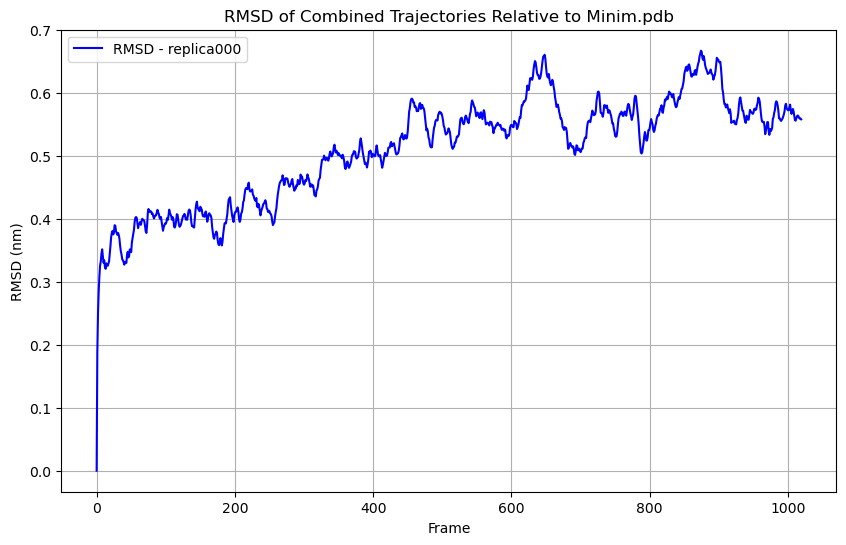

RMSD plot saved as /home/hp/results/C49U/rmsd_plot_combined_trajectories.png


In [13]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import RMSD
import glob
import os
import matplotlib.pyplot as plt

# List of directories containing the combined_trajectory.dcd file
directories = [
    "/home/hp/results/C49U/P142S/replica000"
]

# Define colors for each directory's plot
colors = ["blue", "green", "red"]

# Set up the plot
plt.figure(figsize=(10, 6))

# Loop through each directory and process the combined_trajectory.dcd file
for i, data_path in enumerate(directories):
    print(f"Processing directory: {data_path}")
    
    # Define the path to the combined_trajectory.dcd file
    dcd_file = os.path.join(data_path, "combined_trajectory.dcd")
    
    # Reference PDB file
    pdb_file = os.path.join(data_path, "minim.pdb")  # The PDB file in the same folder
    
    # Check if the .dcd file exists
    if not os.path.exists(dcd_file):
        print(f"Error: {dcd_file} not found.")
        continue
    
    # Load the reference structure
    u = mda.Universe(pdb_file, dcd_file)  # Load the combined trajectory
    
    # Set up an RMSD analysis object
    rmsd_analysis = RMSD(u, u, select="backbone")  # Calculate RMSD for backbone atoms
    rmsd_analysis.run()
    
    # Plot the RMSD for the current trajectory
    plt.plot(rmsd_analysis.rmsd[:, 2], label=f"RMSD - {os.path.basename(data_path)}", color=colors[i])

# Customize the plot
plt.xlabel("Frame")
plt.ylabel("RMSD (nm)")
plt.title("RMSD of Combined Trajectories Relative to Minim.pdb")
plt.legend()
plt.grid(True)

# Save and show the plot
#output_plot_path = "/home/hp/results/C49U/rmsd_plot_combined_trajectories.png"
#plt.savefig(output_plot_path)  # Save the plot
#plt.show()

print(f"RMSD plot saved as {output_plot_path}")


Line does not match: 
Line does not match: Build and version information
Line does not match: 
Line does not match: Build number 5.10.27
Line does not match: Build date   20240812
Line does not match: Built:
Line does not match: by     nsekhar
Line does not match: on     hpc
Line does not match: git id 9325b9c29ad62a733df16f540968e33ee6c78260
Line does not match: with   GNU Fortran Ubuntu 13.2.0-23ubuntu4 13.2.0
Line does not match: Current date 2025- 1- 5 and time 16:19:18
Line does not match: 
Line does not match: --------------------- Reading input from fep_007_0.860.inp --------------------
Line does not match: Boundary: sphere
Line does not match: Number of MD steps =     10000  Stepsize (fs)    =     0.100
Line does not match: Target temperature =    300.00  T-relax time     =     10.00
Line does not match: No thermostat chosen. Berendsen thermostat will be used.
Line does not match: Leap frog integrator used by default.
Line does not match: Solute and solvent atoms coupled separ

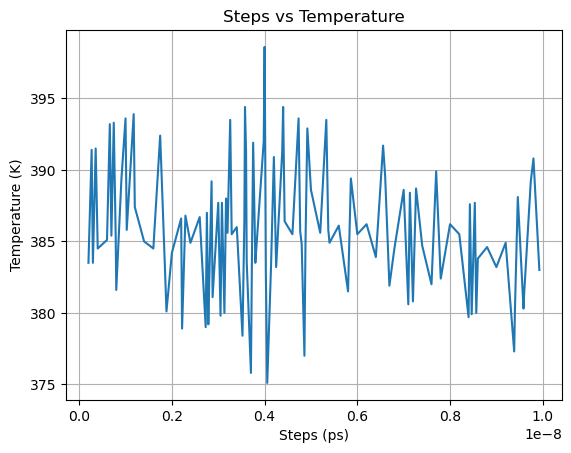

In [22]:
import re
import matplotlib.pyplot as plt
import csv

# Path to the log file
log_file_path = "fep_007_0.860.log"
csv_file_path = "steps_vs_temp.csv"  # Path for the output CSV file

# Define lists to store steps and temperatures
steps = []
temps = []

# Open the log file and extract step and temperature values
with open(log_file_path, 'r') as log_file:
    for line in log_file:
        # Use a more general regular expression for the temperature data line
        match = re.search(r"Temperature at step\s+(\d+):\s*T_tot=\s*(\d+\.\d+)\s*T_free=\s*(\d+\.\d+)", line)
        if match:
            step = int(match.group(1))  # Step is in the format of an integer
            temp = float(match.group(2))  # Temperature is a float value (T_tot)
            print(f"Extracted step: {step}, T_tot: {temp}")  # Debug print for extracted values
            steps.append(step * 1e-12)  # Convert steps to picoseconds (assuming step is in femtoseconds)
            temps.append(temp)
        else:
            print(f"Line does not match: {line.strip()}")  # Print lines that don't match

# Save the extracted data as a CSV file
if steps and temps:
    with open(csv_file_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["Temperature (K)", "Steps (ps)"])  # Writing header
        for temp, step in zip(temps, steps):
            writer.writerow([temp, step])  # Writing data

    print(f"Data saved to {csv_file_path}")

    # Plot the data
    plt.plot(steps, temps)
    plt.xlabel("Steps (ps)")  # Label in picoseconds
    plt.ylabel("Temperature (K)")  # Label in Kelvin
    plt.title("Steps vs Temperature")
    plt.grid(True)
    plt.show()
else:
    print("No data found for plotting.")
